


# Practica 05 - Metodos parametricos
Hernández Navarro Armando





In [41]:
import numpy as np # Importamos para todo xd
import matplotlib.pyplot as plt # Graficas
import sklearn
from sklearn.linear_model import LinearRegression # Importamos regresion lineal
from sklearn.preprocessing import PolynomialFeatures # Importamos polynmialFeatures para la regresion polinomial
from sklearn.model_selection import train_test_split # Importamos para la division
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mlxtend.evaluate import bias_variance_decomp

# Generamos la muestra aleatoria de 10,000 con scale=7.53
rayleigh = np.random.rayleigh(7.53, 10000)


Histograma de la muestra: 


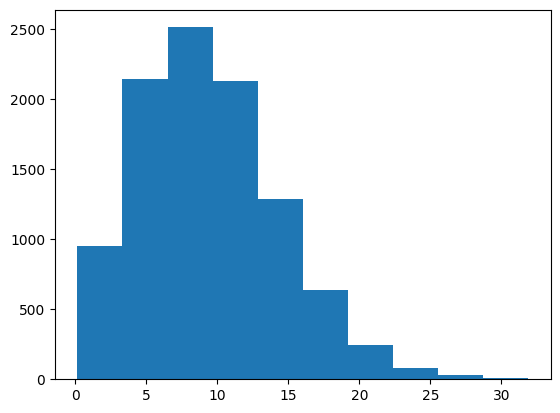

Valor de cada bin:
 [ 951. 2138. 2510. 2125. 1286.  636.  243.   77.   28.    6.]

Limites de cada bin:
 [ 0.14092039  3.3164813   6.4920422   9.6676031  12.84316401 16.01872491
 19.19428582 22.36984672 25.54540762 28.72096853 31.89652943]

Número de bins:  10


In [42]:
# Creamos el histograma de la muestra y la imprimimos
print("Histograma de la muestra: ")
n, bins, patches = plt.hist(rayleigh)
ax = plt.gca()
p = ax.patches
plt.show()


print("Valor de cada bin:\n", n)
print("\nLimites de cada bin:\n", bins)
print("\nNúmero de bins: ",  n.size)

def findVal(x, n, bins):
  """
  Funcion auxiliar para obtener el valor del bin de un número
  param:
    x: int - Valor del cual se busca el bin
    n: list - Lista conteniendo los valores de los bins
    bins: lista - lista conteniendo los limites de los bins
  return:
    int - Valor del bin al que pertenece x
  """
  return n[np.digitize(x, bins)]


In [43]:
# Creamos el conjunto de entrenamiento con los 160 puntos aleatorios
# Ademas, damos la forma correcta al conjunto de entrenamiento

X = np.random.choice(rayleigh, 160, replace=False) #Valores independientes
y = np.array([findVal(x, n, bins) for x in X]) #Valores a predecir

X = X.reshape(-1, 1) # Damos la forma adecada a X


#Dividimos el conjunto en entrenamiento y prueba
#Dividimos el conjunto previo a fit_transform para tener el mismo conjunto en las regresiones
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Cramos 4 regresiones polinomiales y las comparamos entre ellas y con el histograma

  Grado  Average expected loss  Average bias  Average variance            MSE  \
2     2          106537.057173  98215.679913       8321.377259  103915.857998   

          MAE        r2  
2  281.635901  0.816563  


<ipython-input-44-5638c7d4c4e2>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


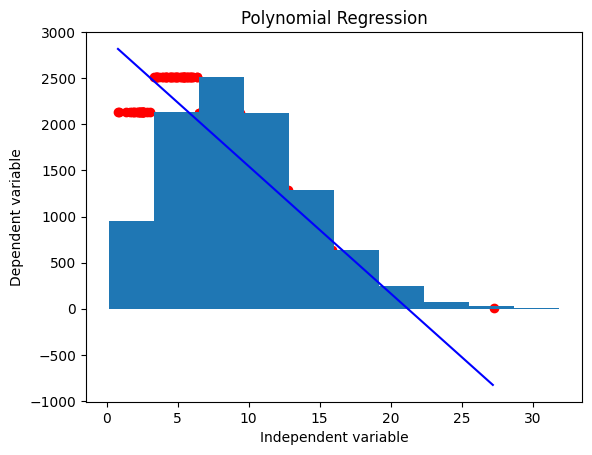

In [44]:
##Regresion polinomial grado 2:

#Creamos el objeto de funciones polinomiales
poly2 = PolynomialFeatures(degree=2)
#Damos la forma a X para la regresion de grado 2
X_poly2 = poly2.fit_transform(X_train)
X_poly_test2 = poly2.transform(X_test)


#Entrenamos el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_poly2, y_train)

#Realizamos las predicciones para la validación
y_pred = lin_reg.predict(X_poly_test2)

#Calculamos metricas
#Grado del polinomio, sesgo(bias), varianza(variance), MAE(MEan absolute error), MSE(Mean squared error), R2(dettermination coefficient)
avg_expected_loss, avg_bias, avg_var= bias_variance_decomp(lin_reg, X_poly2, y_train, X_poly_test2, y_test, loss='mse')
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#Creamos el dataframe para mostrar los resultados:
df2 = pd.DataFrame({'Grado': ["2"],
                    'Average expected loss': [avg_expected_loss],
                   'Average bias': [avg_bias],
                   'Average variance': [avg_var],
                   'MSE': [mse],
                   'MAE': [mae],
                   'r2': [r2]}, index =[2])
print(df2)

#Imprimimos y guardamos la grafica para comparar

# Conjunto de entrenamiento y prueba:
plt.scatter(X, y, color='red')

# Curva obtenida
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.plot(X_grid, lin_reg.predict(poly2.transform(X_grid)), color='blue')

# Histograma original
n, bins, patches = plt.hist(rayleigh)
ax = plt.gca()
p = ax.patches

plt.title('Polynomial Regression')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()



  Grado  Average expected loss  Average bias  Average variance           MSE  \
3     3           29725.775813  24014.618935       5711.156878  30446.145198   

          MAE        r2  
3  146.053098  0.946255  


<ipython-input-45-c11bbe6064ee>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


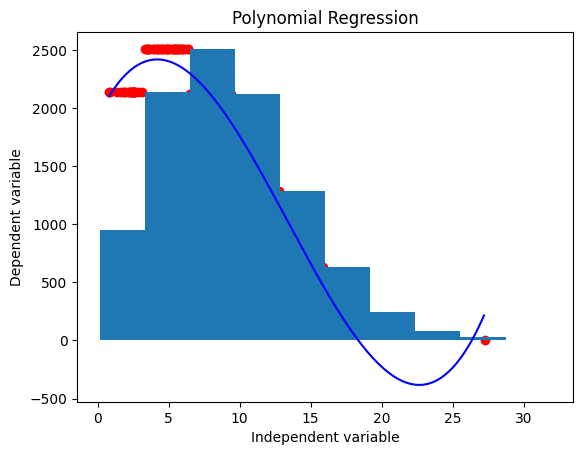

In [45]:
##Regresion polinomial grado 3:

#Creamos el objeto de funciones polinomiales
poly2 = PolynomialFeatures(degree=3)
#Damos la forma a X para la regresion de grado 2
X_poly2 = poly2.fit_transform(X_train)
X_poly_test2 = poly2.transform(X_test)


#Entrenamos el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_poly2, y_train)

#Realizamos las predicciones para la validación
y_pred = lin_reg.predict(X_poly_test2)

#Calculamos metricas
#Grado del polinomio, sesgo(bias), varianza(variance), MAE(MEan absolute error), MSE(Mean squared error), R2(dettermination coefficient)
avg_expected_loss, avg_bias, avg_var= bias_variance_decomp(lin_reg, X_poly2, y_train, X_poly_test2, y_test, loss='mse')
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#Creamos el dataframe para mostrar los resultados:
df3 = pd.DataFrame({'Grado': ["3"],
                    'Average expected loss': [avg_expected_loss],
                   'Average bias': [avg_bias],
                   'Average variance': [avg_var],
                   'MSE': [mse],
                   'MAE': [mae],
                   'r2': [r2]}, index=[3])
print(df3)

#Imprimimos y guardamos la grafica para comparar

# Conjunto de entrenamiento y prueba:
plt.scatter(X, y, color='red')

# Curva obtenida
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.plot(X_grid, lin_reg.predict(poly2.transform(X_grid)), color='blue')

# Histograma original
n, bins, patches = plt.hist(rayleigh)
ax = plt.gca()
p = ax.patches

plt.title('Polynomial Regression')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()


  Grado  Average expected loss  Average bias  Average variance           MSE  \
4     4           24096.173246  22170.290415       1925.882832  21730.221315   

         MAE        r2  
4  112.54397  0.961641  


<ipython-input-46-9d9728b4d297>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


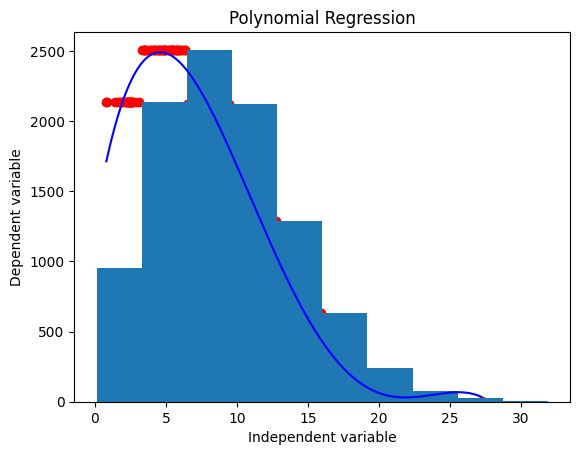

In [46]:
##Regresion polinomial grado 4:

#Creamos el objeto de funciones polinomiales
poly2 = PolynomialFeatures(degree=4)
#Damos la forma a X para la regresion de grado 2
X_poly2 = poly2.fit_transform(X_train)
X_poly_test2 = poly2.transform(X_test)


#Entrenamos el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_poly2, y_train)

#Realizamos las predicciones para la validación
y_pred = lin_reg.predict(X_poly_test2)

#Calculamos metricas
#Grado del polinomio, sesgo(bias), varianza(variance), MAE(MEan absolute error), MSE(Mean squared error), R2(dettermination coefficient)
avg_expected_loss, avg_bias, avg_var= bias_variance_decomp(lin_reg, X_poly2, y_train, X_poly_test2, y_test, loss='mse')
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#Creamos el dataframe para mostrar los resultados:
df4 = pd.DataFrame({'Grado': ["4"],
                    'Average expected loss': [avg_expected_loss],
                   'Average bias': [avg_bias],
                   'Average variance': [avg_var],
                   'MSE': [mse],
                   'MAE': [mae],
                   'r2': [r2]}, index=[4])
print(df4)

#Imprimimos y guardamos la grafica para comparar

# Conjunto de entrenamiento y prueba:
plt.scatter(X, y, color='red')

# Curva obtenida
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.plot(X_grid, lin_reg.predict(poly2.transform(X_grid)), color='blue')

# Histograma original
n, bins, patches = plt.hist(rayleigh)
ax = plt.gca()
p = ax.patches

plt.title('Polynomial Regression')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

  Grado  Average expected loss  Average bias  Average variance          MSE  \
5     5           24097.429038  21316.454679       2780.974359  20935.14181   

          MAE        r2  
5  113.924663  0.963044  


<ipython-input-47-5a27b82ca43d>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


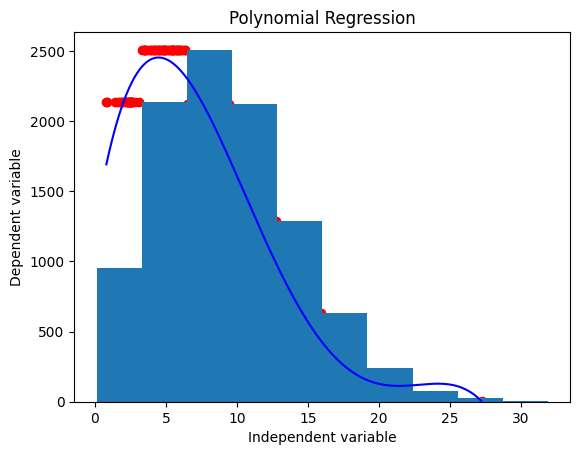

In [47]:
##Regresion polinomial grado 5 (sobreajustado):

#Creamos el objeto de funciones polinomiales
poly2 = PolynomialFeatures(degree=5)
#Damos la forma a X para la regresion de grado 2
X_poly2 = poly2.fit_transform(X_train)
X_poly_test2 = poly2.transform(X_test)


#Entrenamos el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_poly2, y_train)

#Realizamos las predicciones para la validación
y_pred = lin_reg.predict(X_poly_test2)

#Calculamos metricas
#Grado del polinomio, sesgo(bias), varianza(variance), MAE(MEan absolute error), MSE(Mean squared error), R2(dettermination coefficient)
avg_expected_loss, avg_bias, avg_var= bias_variance_decomp(lin_reg, X_poly2, y_train, X_poly_test2, y_test, loss='mse')
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#Creamos el dataframe para mostrar los resultados:
df5 = pd.DataFrame({'Grado': ["5"],
                    'Average expected loss': [avg_expected_loss],
                   'Average bias': [avg_bias],
                   'Average variance': [avg_var],
                   'MSE': [mse],
                   'MAE': [mae],
                   'r2': [r2]}, index=[5])
print(df5)

#Imprimimos y guardamos la grafica para comparar

# Conjunto de entrenamiento y prueba:
plt.scatter(X, y, color='red')

# Curva obtenida
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.plot(X_grid, lin_reg.predict(poly2.transform(X_grid)), color='blue')

# Histograma original
n, bins, patches = plt.hist(rayleigh)
ax = plt.gca()
p = ax.patches

plt.title('Polynomial Regression')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

Mejores parametros obtenidos:  {'alpha': 0.1}
Mejor score:  -102253.14770379156
   Grado  Average expected loss   Average bias  Average variance  \
6  Cross          117928.718383  115441.419745       2487.298639   

             MSE         MAE        r2  
6  114688.978614  288.620338  0.797546  


<ipython-input-48-c49f27007fb3>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


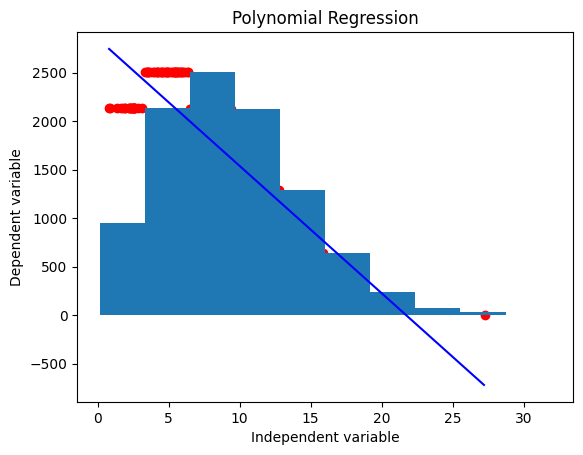

In [48]:
#Aplicamos validacion cruzada y regularización
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#Parametros para la validación cruzada
param_grid = {'alpha': [0.1, 1.0, 10.0]}

#Creamos el modelo de regularización
ridge = Ridge()

#Realizamos grid search con cross validation
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Mejores parametros obtenidos
print("Mejores parametros obtenidos: ", grid_search.best_params_)
print("Mejor score: ", grid_search.best_score_)


y_pred = grid_search.predict(X_test)

#Calculamos metricas
#Grado del polinomio, sesgo(bias), varianza(variance), MAE(MEan absolute error), MSE(Mean squared error), R2(dettermination coefficient)
avg_expected_loss, avg_bias, avg_var= bias_variance_decomp(grid_search , X_train, y_train, X_test, y_test, loss='mse')
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#Creamos el dataframe para mostrar los resultados:
df6 = pd.DataFrame({'Grado': ["Cross"],
                   'Average expected loss': [avg_expected_loss],
                   'Average bias': [avg_bias],
                   'Average variance': [avg_var],
                   'MSE': [mse],
                   'MAE': [mae],
                   'r2': [r2]}, index=[6])
print(df6)



# Valores de entrenamiento
plt.scatter(X, y, color='red')

# Curva obtenida
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.plot(X_grid, grid_search.predict(X_grid), color='blue')

# Histograma original
n, bins, patches = plt.hist(rayleigh)
ax = plt.gca()
p = ax.patches

plt.title('Polynomial Regression')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()


In [49]:
# Mostramos la comparacion en un solo df
comp = pd.concat([df2, df3, df4, df5, df6])
print(comp)

   Grado  Average expected loss   Average bias  Average variance  \
2      2          106537.057173   98215.679913       8321.377259   
3      3           29725.775813   24014.618935       5711.156878   
4      4           24096.173246   22170.290415       1925.882832   
5      5           24097.429038   21316.454679       2780.974359   
6  Cross          117928.718383  115441.419745       2487.298639   

             MSE         MAE        r2  
2  103915.857998  281.635901  0.816563  
3   30446.145198  146.053098  0.946255  
4   21730.221315  112.543970  0.961641  
5   20935.141810  113.924663  0.963044  
6  114688.978614  288.620338  0.797546  


# Mejor modelo
Podemos ver que el mejor modelo polinomial obtenido fue el de grado 4.
Esto se debe a que, consistentemente tiene el menor valor de Varianza, Bias, MAE y R2; y aunque a veces su MSE fue mayor que el de grado 5, indicando que sus errores fueron mayores a lo esperado, el resto de medidas indican que tuvo menos errores. De esto, también podemos inferir que el modelo polinomial de grado 5 a menudo se sobreajusta.
